# Entrega 2
### Ignacio Ziccardi
### Calcular una DFT

In [7]:
#%%Imports
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

In [8]:
#%%  Valores de parámetros

Fo = 1.0
Fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
ts = 1/Fs # tiempo de muestreo
df = Fs/N # resolución espectral
Ac =1 #Amplitud 
DC = 0 #Valor Contínua
tita= 0 #Defasaje

In [9]:
#%% Funcion generadora de senoidal
def my_sin_gen( vmax, dc, fo, ph, nn, fs): 
    tt = np.arange(0,nn*1/fs,1/fs) # grilla de sampleo temporal
    xx = vmax*np.sin(2*np.pi*fo*tt + ph) + dc #Senoidal
    return [tt, xx]

In [10]:
#%% Funcion DFT 

def my_DFT(xx):
    ##Necesito el tamaño de la señal de entrada
    N = len(xx)
    n = np.arange(N)#Vector donde tengo de 0 hasta N
    k = n.reshape((N, 1))#Vector de k de N filas y 1 Columna
    e = np.exp(-2j * np.pi * k * n / N)#Matriz con los valores de las exponenciales
    X = np.dot(e, xx)#Multiplico La matriz de exponenciales por el vector de entrada y será la sumatoria de las exponenciales escaladas con la muestra
    return X


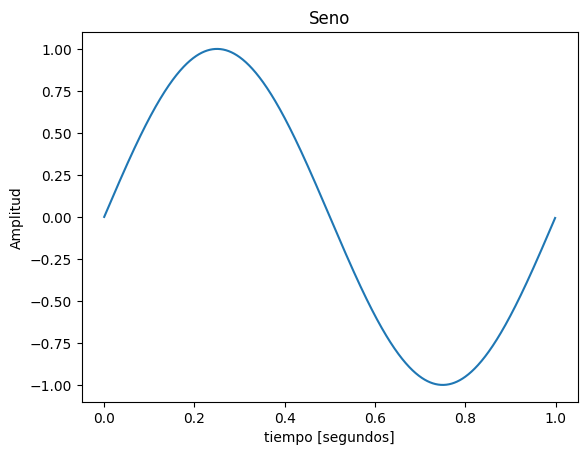

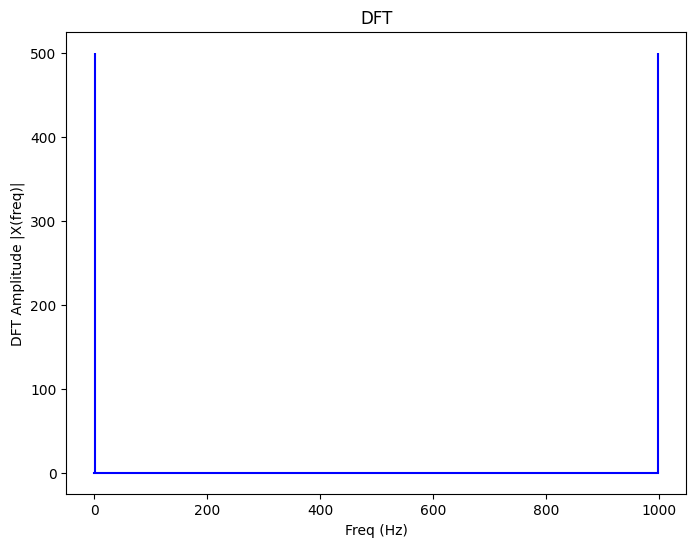

In [15]:
#%% Caso 1: Senoidal Común
tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = Fo, ph=tita, nn = N, fs = Fs )#Obtengo una senoidal

#Ploteo la senoidal
plt.figure(1)
plt.title('Seno')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud')
plt.plot(tt, s)
plt.show()
#Calculo la DFT de la senoidal
S = my_DFT(s)
Sphase = np.angle(S)
Smod = np.abs(S)

#Ploteo Resultado de la DFT
TT = np.arange(len(S))
plt.figure(figsize = (8, 6))
plt.title('DFT')
plt.stem(TT*df, np.abs(S), 'b', \
markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


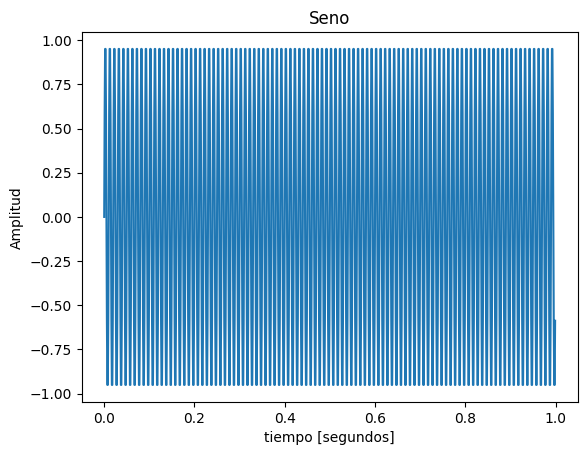

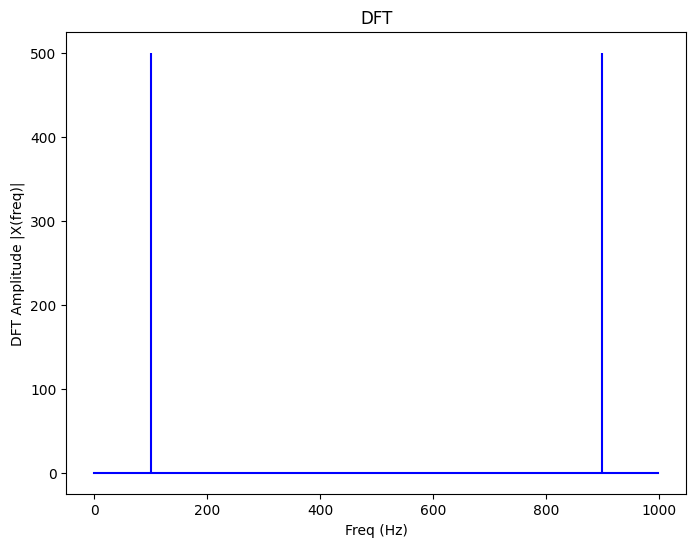

In [16]:
#%% Caso 2: Senoidal con una Fo mayor
tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = 100*Fo, ph=tita, nn = N, fs = Fs )#Obtengo una senoidal

#Ploteo la senoidal
plt.figure(1)
plt.title('Seno')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud')
plt.plot(tt, s)
plt.show()
#Calculo la DFT de la senoidal
S = my_DFT(s)
Sphase = np.angle(S)
Smod = np.abs(S)

#Ploteo Resultado de la DFT
TT = np.arange(len(S))
plt.figure(figsize = (8, 6))
plt.title('DFT')
plt.stem(TT*df, np.abs(S), 'b', \
markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


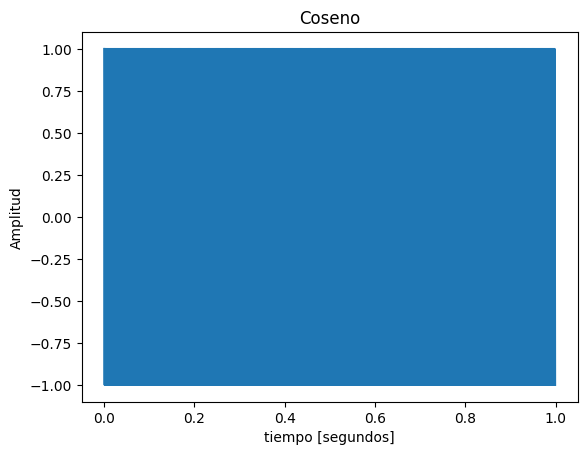

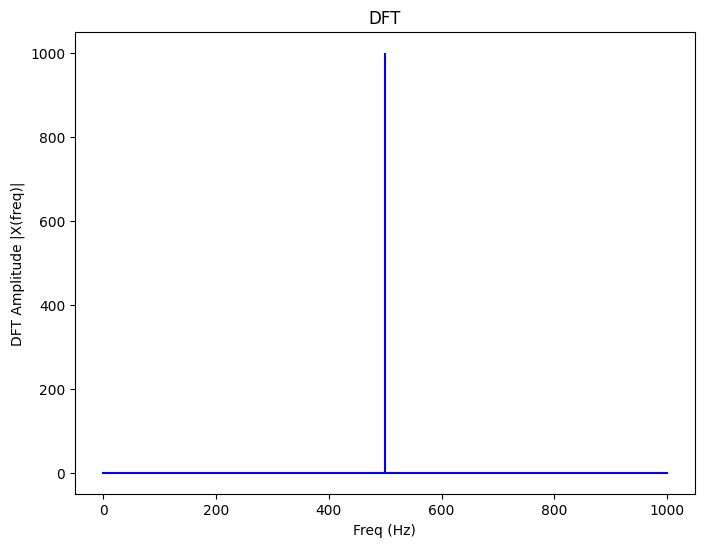

In [17]:
#%% Caso 3: Coseno con una Fo = Fs/2
tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = Fs/2, ph=np.pi/2, nn = N, fs = Fs )#Obtengo una senoidal

#Ploteo la senoidal
plt.figure(1)
plt.title('Coseno')
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud')
plt.plot(tt, s)
plt.show()
#Calculo la DFT de la senoidal
S = my_DFT(s)
Sphase = np.angle(S)
Smod = np.abs(S)

#Ploteo Resultado de la DFT
TT = np.arange(len(S))
plt.figure(figsize = (8, 6))
plt.title('DFT')
plt.stem(TT*df, np.abs(S), 'b', \
markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


## Conclusiones

#### DFT:

Se realizaron pruebas y análisis variando parámetros de la senoidal y observando la DFT obtenida. Al ser una señal senoidal se esperaba obtener una delta en la frecuencia de sampleo, sin embargo se obtienen dos deltas, uno en la Fo y otro en la Fs. Al existir una relación entre las funciones trigonométricas y exponenciales, a partir de la senoidal se observan dos exponenciales escaladas por un -j, el cual defasa las deltas -π/2 de donde se esperaría observarlas. Esto se verifica observando la fase para los valores de la DFT donde se presentan los deltas.(Variable Sphase)
Lo interesante es que al aplicar la DFT a un coseno donde la Fo=Fs/2 (Nyquist) se observa un único delta pero con el doble de potencia ya que ambos deltas se superponen. Por lo que se concluye que cualquier análisis espectral deberá abarcar un espectro entre 0 y (Fs/2)-1.

#### FFT:
El cálculo de la DFT es una cuenta compleja que escala exponencialmente el algoritmo según el tamaño de la señal, en el caso analizado se puede observar que se realiza un producto matricial donde una matriz es de NxN y de números complejos, por lo no resulta un proceso optimizado. Por lo tanto, en la práctica se utiliza la FFT que implementa optimizaciones en el algoritmo aprovechando la simetría y periodicidad de la DFT.